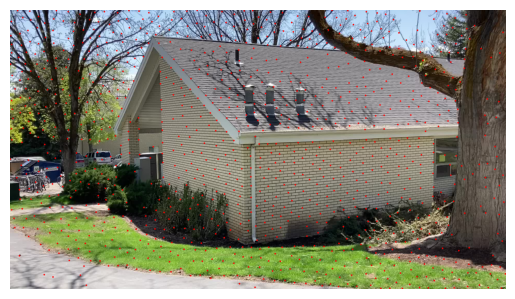

In [9]:
# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image and converting into B?W
image = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=2048, qualityLevel=0.02, minDistance=32)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Showing the image
plt.imshow(RGB_img)
plt.axis('off')
plt.show()

# cv2.imshow('good_features', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

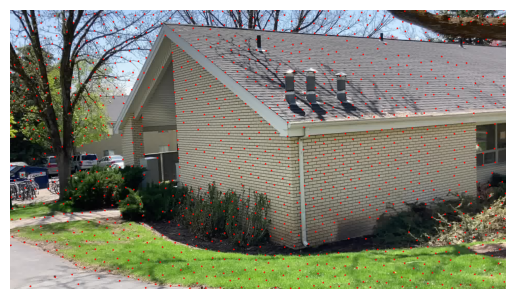

In [50]:
# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image and converting into B?W
image = cv2.imread("Data/20230501_205454000_iOS/output_0162.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=2048, qualityLevel=0.02, minDistance=32)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Showing the image
plt.imshow(RGB_img)
plt.axis('off')
plt.show()

cv2.imshow('good_features', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

https://www.youtube.com/watch?v=RtsCs_VfszE

https://www.youtube.com/watch?v=Ilv6FYVZuVQ

https://www.youtube.com/watch?v=E1DMomAlDJo

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# feature_params = dict(maxCorners=4096, qualityLevel=0.02, minDistance=32, blockSize=9)
# lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.02))


# image_0 = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
# image_1 = cv2.imread("Data/20230501_205454000_iOS/output_0002.jpg")
# image_2 = cv2.imread("Data/20230501_205454000_iOS/output_0003.jpg")
# image_0_gray = cv2.cvtColor(image_0, cv2.COLOR_BGR2GRAY)
# image_1_gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
# image_2_gray = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)

# # find corners in first frame
# corners_0 = cv2.goodFeaturesToTrack(image_0_gray, **feature_params)
# # print(corners_0.shape[0])
# # print(corners_0[0])
# # calculate optical flow
# p1, status, err = cv2.calcOpticalFlowPyrLK(image_0_gray, image_1_gray, corners_0, None, **lk_params)
# # print(p1.shape)
# # find homography
# H_matrix, mask = cv2.findHomography(corners_0, p1, cv2.RANSAC, 5.0) 
# matchesMask = mask.ravel().tolist()


# # Select only the points for which the flow was found
# good_new = corners_0[status == 1]
# good_old = p1[status == 1]

# # Draw the points on the new frame
# for i, (new, old) in enumerate(zip(good_new, good_old)):
#     a, b = new.ravel()
#     c, d = old.ravel()
#     out_frame = cv2.circle(image_1, (a,b), 5, (0,255,0), -1)

# cv2.imshow('Frame', out_frame)
# cv2.waitKey(0)

# #
# p0r, _, _ = cv2.calcOpticalFlowPyrLK(image_1_gray, image_0_gray, p1, None, **lk_params)

# d = abs(p1-p0r).reshape(-1, 2).max(-1)

# good = d < 1


# # find corners in second frame
# new_corners_1 = []






# # apply mask and homography
# cv2.destroyAllWindows()


In [98]:
import cv2
import numpy as np


# feature_params = dict(maxCorners=4096, qualityLevel=0.04, minDistance=32, blockSize=5)
# feature_params = dict(maxCorners=4096, qualityLevel=0.06, minDistance=9, blockSize=9)
feature_params = dict(maxCorners=2048, qualityLevel=0.02, minDistance=7, blockSize=9)
lk_params = dict(winSize=(15, 15), maxLevel=1, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Load the images
old_frame = cv2.imread('Data/20230501_205454000_iOS/output_0162.jpg')
new_frame = cv2.imread('Data/20230501_205454000_iOS/output_0167.jpg')
new_con_img = new_frame.copy()

# Convert to grayscale
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
new_gray = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)

# Find good features to track
old_points = cv2.goodFeaturesToTrack(old_gray, **feature_params)
good = d < 1

# Calculate optical flow
new_points, status, err = cv2.calcOpticalFlowPyrLK(old_gray, new_gray, old_points, None, **lk_params)

# p0r, _, _ = cv2.calcOpticalFlowPyrLK(new_gray, old_gray, new_points, None, **lk_params)

# d = abs(old_points-p0r).reshape(-1,2).max(-1)
# good = d < 1
# print(good.shape)
# print(good.ravel().tolist())
# print(status.shape)
# print(status)
# Select only the points for which the flow was found
good_new = new_points[status == 1]
good_old = old_points[status == 1]
# good_new = new_points[good == 1]
# good_old = old_points[good == 1]

# Draw the points on the new frame
for i, (new, old) in enumerate(zip(good_new, good_old)):
    a, b = new.ravel()
    c, d = old.ravel()
    new_con_img = cv2.line(new_frame, (int(a), int(b)), (int(c), int(d)), (255,0,0), 2)
    new_con_img = cv2.circle(new_frame, (int(a), int(b)), 1, (0, 0, 255), -1)

print(good_new.shape)
print(good_old.shape)
# cv2.imshow('Frame', new_con_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# find homography
H_matrix, mask = cv2.findHomography(good_old, good_new, cv2.RANSAC, 
                                ransacReprojThreshold = 0.2, maxIters = 5000, confidence = 0.999999)
# print(mask)
# print(mask.ravel().tolist())
# matchesMask = mask.ravel().tolist()
matchesMask = mask.ravel()
print(len(matchesMask))
# Count the number of 1s in the mask
num_ones = matchesMask.sum()
# Print the result
# print(num_ones)

# Plot only the points for which the mask is True
for point in good_new[matchesMask.astype(bool)]:
    # print(point)
    x, y = point
    # print(x, y)
    img = cv2.circle(new_frame, (int(x), int(y)), 5, (0,255,0), 1)

cv2.imshow('Image', img)
cv2.waitKey(0)


cv2.destroyAllWindows()

(2032, 2)
(2032, 2)
2032


In [13]:
# Define the points and the mask
points = np.array([[10, 20], [30, 40], [50, 60], [70, 80]])
mask = np.array([True, False, True, False])

# Plot only the points for which the mask is True
for point in points[mask]:
    x, y = point
    print(x, y)

10 20
50 60
